# TERM PROJECT
>**<p style="font-size:20px">INDEX</p><br>**
    >   1. Dataset<br>
    >   2. Object & Purpose<br>
    >   3. Schedule<br>
    >   4. Description<br>

***
***

## 1. DataSet
**[E-commerce Shipping Data](https://www.kaggle.com/datasets/prachi13/customer-analytics)**

>*This is the data of Product Shipment Tracking
>*The data set has 12 atrributes and 10999 data 
    
**Dataset Attributes**

1. **ID**: ID Number of Customers.
2. **Warehouse block**: The Company have big Warehouse which is divided in to block such as A, B, C, D, F.
3. **Mode of shipment**: The Company Ships the products in multiple way such as Ship, Flight and Road.
4. **Customer care calls**: The number of calls made from enquiry for enquiry of the shipment.
5. **Customer rating**: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. **Cost of the product**: Cost of the Product in US Dollars.
7. **Prior purchases**: The Number of Prior Purchase.
8. **Product importance**: The company has categorized the product in the various parameter such as low, medium, high.
9. **Gender**: Male and Female.
10. **Discount offered**: Discount offered on that specific product.
11. **Weight in gms**: It is the weight in grams.
12. **Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
***

## 2. Object & Purpose

**Reached.on.Time_Y.N**
    
    The target is “Reached.on.Time_Y.N”. Reached.on.Time_Y.N represents 1 if the product was reached on time, and 0 if it was not reached on time. Other features allow us to predict whether a product will reach on time. If it is predicted that it cannot be reached on time, it can guide customers again, which will help the business.
***

## 3. Schedule
This project would get **every MONDAY 20:00**<br>
***

## 4. Description
1. import libraries and data-set
2. check missing value & describe data
3. change categorical value (LabelEncoder)
4. show statistical chart
5. scaling

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import copy

In [2]:
data = pd.read_csv("ecommerce_shipping.csv")
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data.shape

(10999, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

no need to treat null value(there isn't null value)

### Target, NonTarget Define

In [7]:
target_feature = 'Reached.on.Time_Y.N' # resulting target
target_range = [0, 1] # range of target
other_feature = ['Warehouse_block', 
                'Mode_of_Shipment',
                'Customer_care_calls',
                'Customer_rating',
                'Cost_of_the_Product',
                'Prior_purchases',
                'Product_importance',
                'Gender',
                'Discount_offered',
                'Weight_in_gms'
                 ]

### Make histogram 

In [8]:
# def : make histogram number of feature value according to each categorical target feature
# input : target feature, features without target, target range, whole dataframe
def makehist_countft_bytg(tg_name,ft_name,tg_range,data):
    fig, axes = plt.subplots(1, len(tg_range),sharex = True, sharey = True, figsize=(22,5)) #make fig    
    fig.suptitle(ft_name)
    axes_cnt = 0
    for i in tg_range:
        data_per_target = data[data[tg_name] == i]
        data_per_target = data_per_target[ft_name] 
        axes[axes_cnt].hist(data_per_target, bins = 10)
        axes[axes_cnt].grid(True)
        axes[axes_cnt].set_title(tg_name +" = " + str(i))
        axes_cnt = axes_cnt + 1
    plt.show()

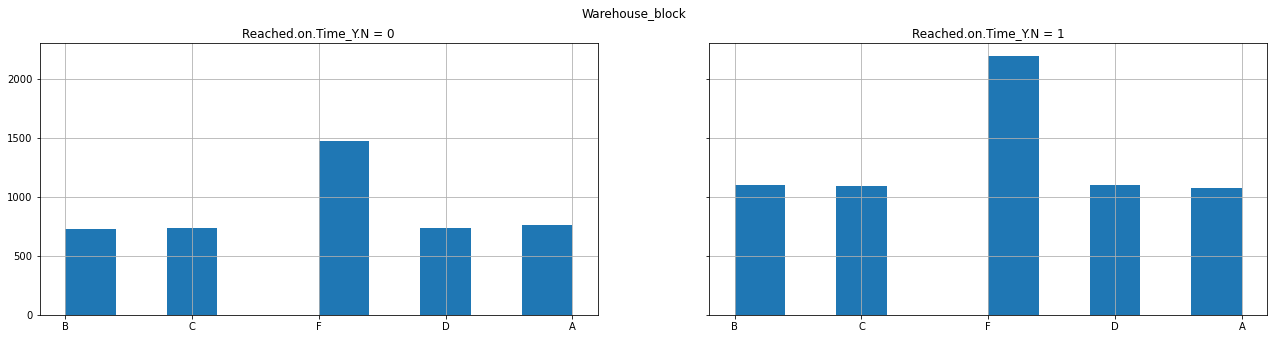

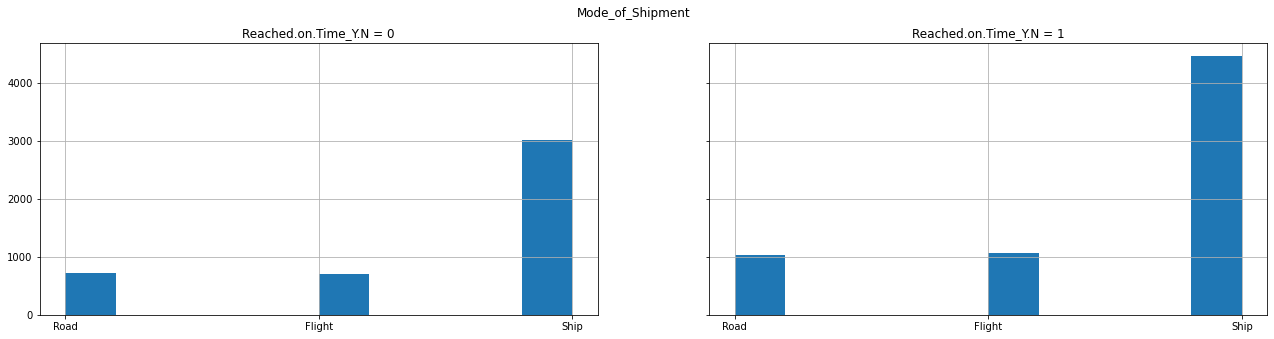

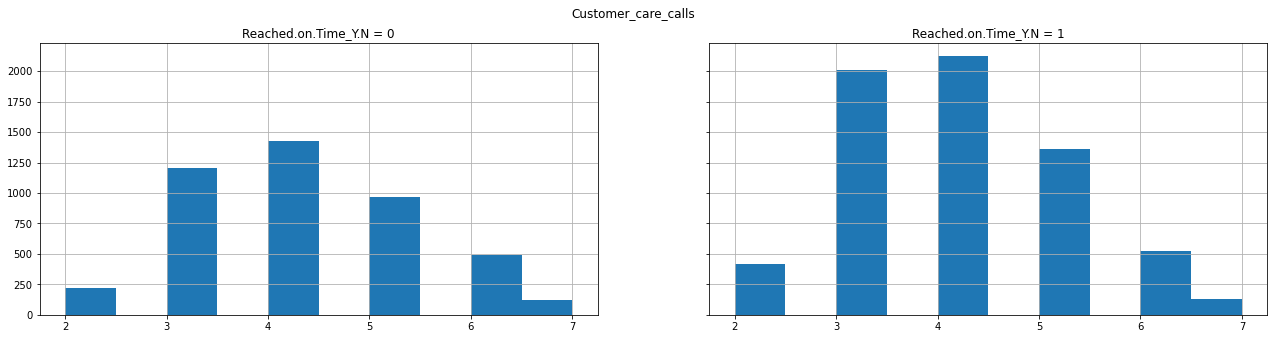

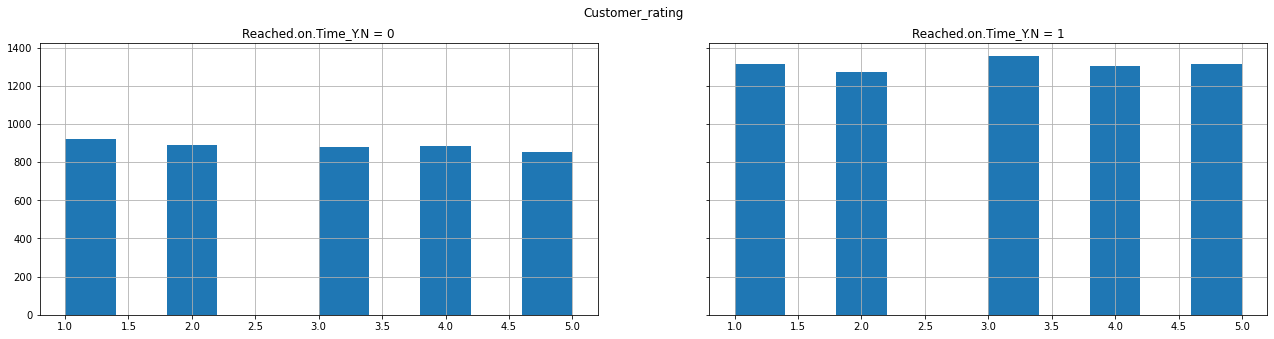

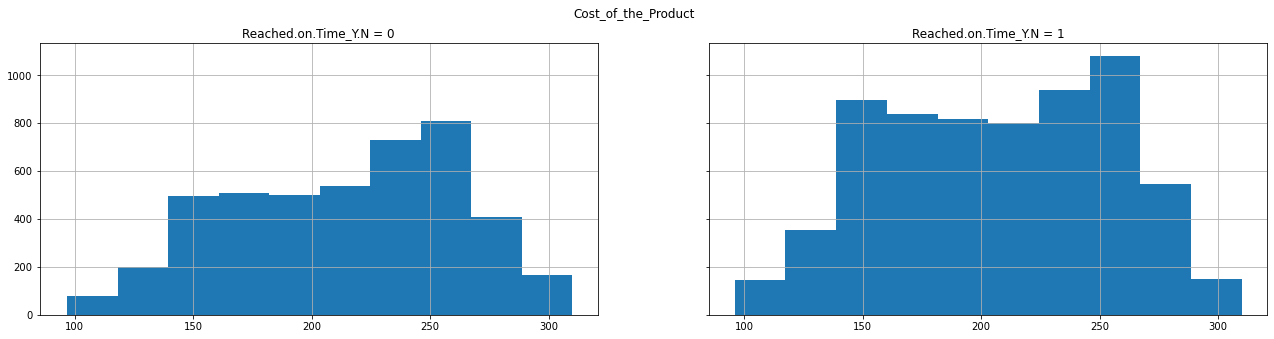

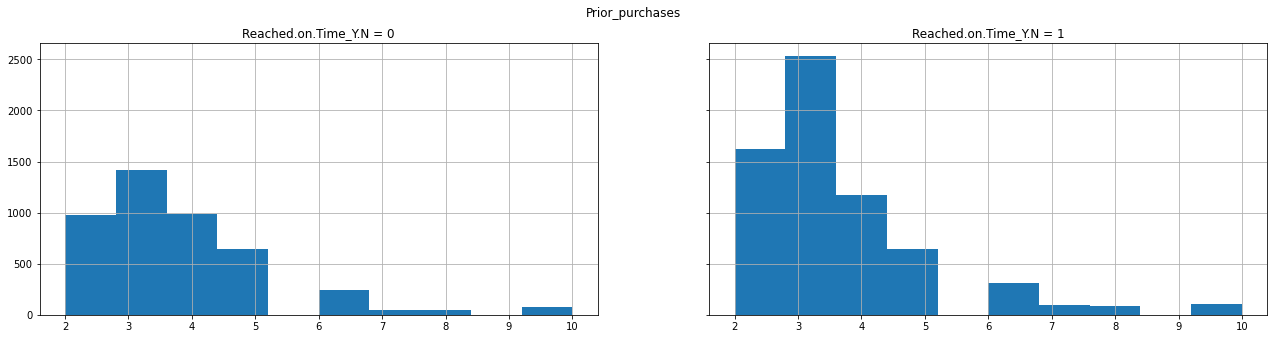

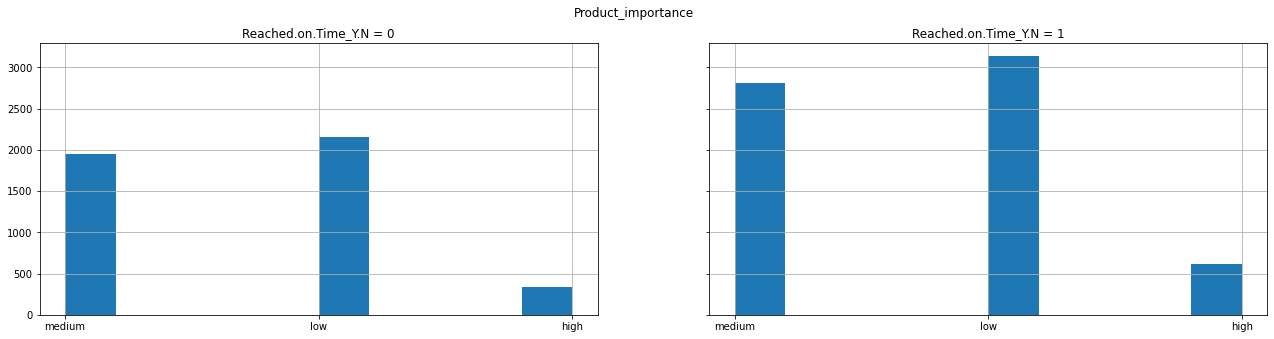

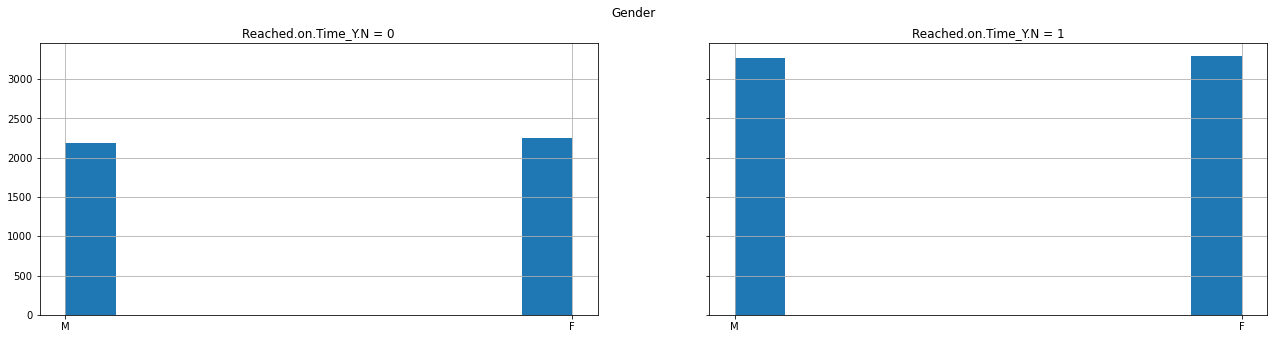

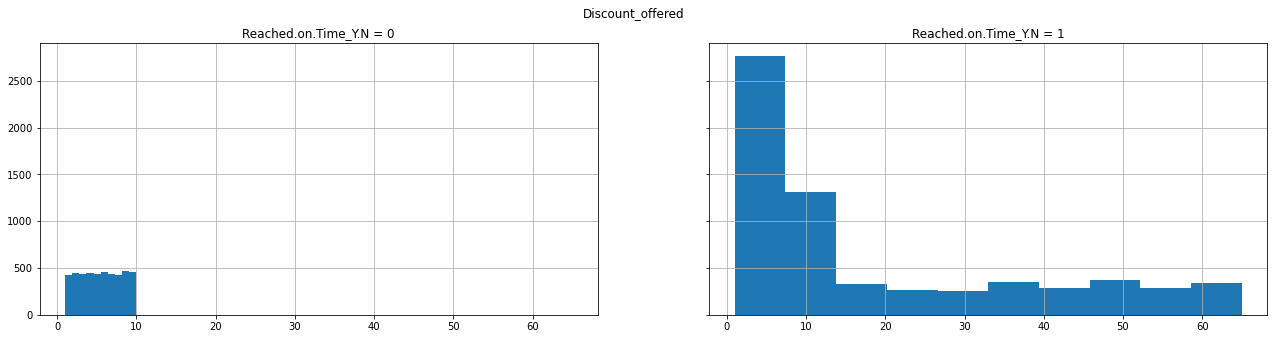

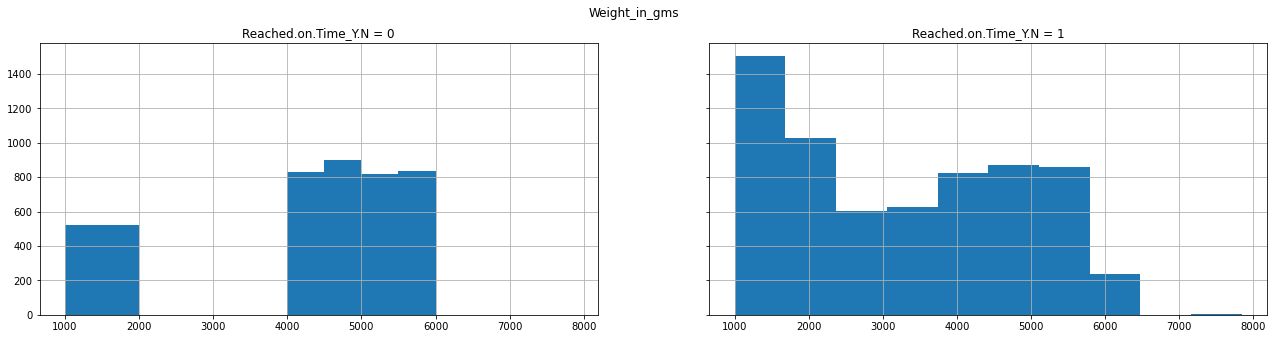

In [9]:
for i in other_feature:
    makehist_countft_bytg(target_feature,i,target_range,data)

### Correlation

<AxesSubplot:>

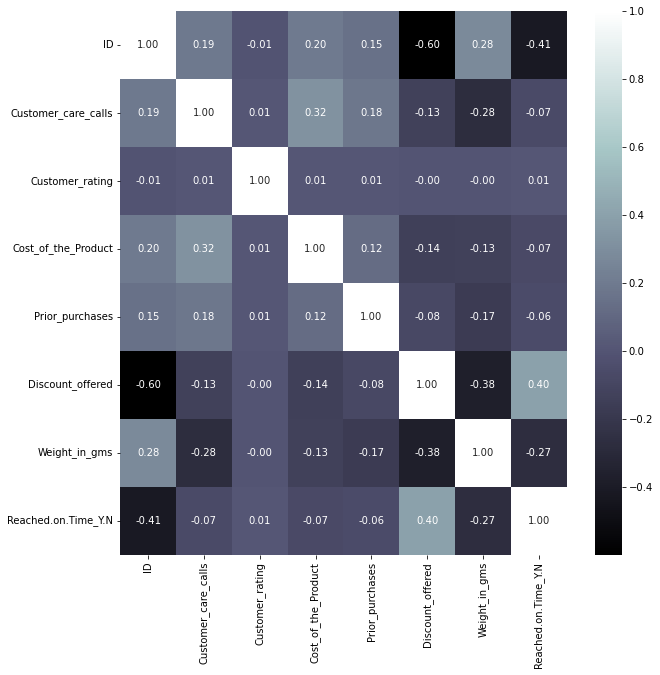

In [10]:
# heatmap corrleation
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap = 'bone')

### Change Categorical data

In [11]:
label_encoder = LabelEncoder()
cateogical_feature_name = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
for feature_name in cateogical_feature_name:
    data[feature_name] = label_encoder.fit_transform(data[feature_name])
data

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0


### Scaling def

In [12]:
# drop target feature
y = data[target_feature]
X = data.drop(target_feature, axis=1)

# test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
9957,9958,1,2,7,4,282,4,1,1,6,1800
1507,1508,4,0,4,1,135,2,2,0,64,1471
6382,6383,2,2,4,1,214,2,1,0,10,4447
1559,1560,4,2,3,1,171,2,1,1,1,1629
5703,5704,1,2,5,5,248,2,1,1,4,5587
...,...,...,...,...,...,...,...,...,...,...,...
5734,5735,2,1,3,5,275,2,1,0,7,4619
5191,5192,4,1,5,5,187,4,2,0,9,5326
5390,5391,0,2,4,2,137,2,2,0,2,5804
860,861,0,2,5,3,144,6,2,0,35,1009


In [13]:
def Scaling(X_train, X_test, scaler):
    scaled_train = pd.DataFrame(scaler.fit_transform(X_train))
    scaled_test = pd.DataFrame(scaler.fit_transform(X_test))
    return scaled_train, scaled_test

In [14]:
def Classifier(X, y, model, scalers):
    return_res=[]
    
    index = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in scalers:
        X_train, X_test = Scaling(X_train, X_test, i)
        
        # KFold
        kf = KFold(n_splits=5)

        param = range(2, 12)
        for p in param:
            result = []
            t = time.time()
            result.append(model)
            result.append(i)
            
            if model.find("KNeighbor")!=-1 and p%2==1:
                m = KNeighborsClassifier(n_neighbors=p)
                result.append(p)
                
            elif model.find("Tree")!=-1:
                if model.find("gini")!=-1:
                    m = DecisionTreeClassifier(criterion = 'gini', max_depth = p)
                elif model.find("entropy")!=-1:
                    m = DecisionTreeClassifier(criterion = 'entropy', max_depth = p)
                result.append(p)
            elif model.find("Logistic")!=-1 and p==2:
                m = LogisticRegression()
                result.append(['no Param'])
                
            else:
                continue
            
            for train_index, test_index in kf.split(X_train):
                X_kf, y_kf = X_train.iloc[train_index], y_train.iloc[train_index]
                m.fit(X_kf, y_kf)
                
            y_pred = m.predict(X_test)
            
            scores = cross_val_score(m, X_train, y_train, cv=5)
            score_cv = scores.mean()
            fper, tper, thresholds = roc_curve(y_test, y_pred)
            score_auc = auc(fper, tper)
            
            score_ac = accuracy_score(y_test, y_pred)
            score_r2 = 0
            
            runtime = time.time() - t
            
            result.append(score_cv)
            result.append(score_auc)
            result.append(score_ac)
            result.append(score_r2)
            result.append(runtime)

            return_res.append(result)
            
    return return_res

In [15]:
def Regression(X, y, model, scalers):
    return_res=[]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # KFold
    kf = KFold(n_splits=5)
        
    for i in scalers:
        result = []
        t = time.time()
        
        X_train, X_test = Scaling(X_train, X_test, i)

        if model == 'polynomialRegression':
            poly = PolynomialFeatures(degree = 2, include_bias = True)
            X_train_ = poly.fit_transform(X_train)
            X_test_ = poly.fit_transform(X_test)
        
        elif model == 'multipleRegression':
            X_train_ = X_train
            X_test_ = X_test
        else:
            continue
            
        result.append(model)
        result.append(i)
        result.append(['no Param'])
        model = LinearRegression()
        for train_index, test_index in kf.split(X_train):
            X_kf, y_kf = pd.DataFrame(X_train_).iloc[train_index], y_train.iloc[train_index]
            model.fit(X_kf, y_kf)
                
        y_predict = model.predict(X_test_)
        
        scores = cross_val_score(model, X_train_, y_train, cv=5)
        score_cv = scores.mean()
        fper, tper, thresholds = roc_curve(y_test, y_predict)
        score_auc = auc(fper, tper)
        
        score_ac = 0
        score_r2 = r2_score(y_test, y_predict)
        
        runtime = time.time() - t   
        result.append(score_cv)
        result.append(score_auc)
        result.append(score_ac)
        result.append(score_r2)
        result.append(runtime)
         
        return_res.append(result)
            
    return return_res

In [19]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def Ensemble(X, y, model, scalers):
    return_res=[]
    
    index = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    for i in scalers:
        X_train, X_test = Scaling(X_train, X_test, i)
        
        # KFold
        kf = KFold(n_splits=5)

        n_estimator_range = range(2, 12)
        max_depth_range = range(3,7)
        for n_estimator_param in n_estimator_range:
            for max_depth_param in max_depth_range:
                result = []
                param_list =""
                t = time.time()
                result.append(model)
                result.append(i)
                
                param_list = 'n_estimators' + str(n_estimator_param) + 'max_depth' + str(max_depth_param)
                #param_list.append(n_estimator_param)
                #param_list.append(max_depth_param)
                if model == 'RandomForest':
                    m = RandomForestClassifier(n_estimators = n_estimator_param, max_depth = max_depth_param)
                    #param_list = 'n_estimators' + str(n_estimator_param) + 'max_depth' + str(max_depth_param)
                elif model == 'GradientBoosting(gini)':
                    m = GradientBoostingClassifier(learning_rate = 1, n_estimators = n_estimator_param, max_depth = max_depth_param)
                    #param_list = 'n_estimators' + str(n_estimator_param) + 'max_depth' + str(max_depth_param)
                #elif model == 'GradientBoosting(entropy)':
                 #   m = GradientBoostingClassifier(criterion = 'entropy', n_estimators = n_estimator_param, max_depth = max_depth_param)
                else:
                    continue
                
                result.append(param_list)
                
                for train_index, test_index in kf.split(X_train):
                    X_kf, y_kf = X_train.iloc[train_index], y_train.iloc[train_index]
                    m.fit(X_kf, y_kf)
                
                y_pred = m.predict(X_test)
            
                scores = cross_val_score(m, X_train, y_train, cv=5)
                score_cv = scores.mean()
                fper, tper, thresholds = roc_curve(y_test, y_pred)
                score_auc = auc(fper, tper)
            
                score_ac = accuracy_score(y_test, y_pred)
                score_r2 = 0
            
                runtime = time.time() - t
            
                result.append(score_cv)
                result.append(score_auc)
                result.append(score_ac)
                result.append(score_r2)
                result.append(runtime)
    
                return_res.append(result)
            
    return return_res

RandomForest
[['RandomForest', StandardScaler(), 'n_estimators2max_depth3', 0.6820379230905547, 0.7083898206311037, 0.6787878787878788, 0, 0.1406233310699463], ['RandomForest', StandardScaler(), 'n_estimators2max_depth4', 0.6812585335392353, 0.7390171823624674, 0.6872727272727273, 0, 0.17858099937438965], ['RandomForest', StandardScaler(), 'n_estimators2max_depth5', 0.6824269427778199, 0.7147013176620699, 0.6803030303030303, 0, 0.15454888343811035], ['RandomForest', StandardScaler(), 'n_estimators2max_depth6', 0.6743744884095761, 0.690896905825195, 0.6684848484848485, 0, 0.16756200790405273], ['RandomForest', StandardScaler(), 'n_estimators3max_depth3', 0.6774919622288044, 0.7354883876429308, 0.6833333333333333, 0, 0.1805107593536377], ['RandomForest', StandardScaler(), 'n_estimators3max_depth4', 0.6837250533741762, 0.7248168891397163, 0.68, 0, 0.19947314262390137], ['RandomForest', StandardScaler(), 'n_estimators3max_depth5', 0.6825567285216408, 0.7223240356774795, 0.6812121212121212,

RandomForest complete
GradientBoosting(gini)
[['GradientBoosting(gini)', StandardScaler(), 'n_estimators2max_depth3', 0.6799594946963368, 0.7191073268881581, 0.6803030303030303, 0, 0.28821468353271484], ['GradientBoosting(gini)', StandardScaler(), 'n_estimators2max_depth4', 0.6830768841295157, 0.6921621190557982, 0.6696969696969697, 0, 0.3450756072998047], ['GradientBoosting(gini)', StandardScaler(), 'n_estimators2max_depth5', 0.6716469625241555, 0.6729462138685773, 0.6609090909090909, 0, 0.39994001388549805], ['GradientBoosting(gini)', StandardScaler(), 'n_estimators2max_depth6', 0.6759325924238204, 0.6894721990479463, 0.6633333333333333, 0, 0.48569154739379883], ['GradientBoosting(gini)', StandardScaler(), 'n_estimators3max_depth3', 0.6829466764554484, 0.7197936092162732, 0.6787878787878788, 0, 0.3949439525604248], ['GradientBoosting(gini)', StandardScaler(), 'n_estimators3max_depth4', 0.6803494426301443, 0.6877714457476566, 0.6690909090909091, 0, 0.4936516284942627], ['GradientBoost

GradientBoosting(gini) complete
[[['RandomForest', StandardScaler(), 'n_estimators2max_depth3', 0.681778351602913, 0.7337730652205918, 0.6845454545454546, 0, 0.1356337070465088], ['RandomForest', StandardScaler(), 'n_estimators2max_depth4', 0.6756719239175378, 0.7319588261274967, 0.6845454545454546, 0, 0.1486060619354248], ['RandomForest', StandardScaler(), 'n_estimators2max_depth5', 0.6734648067981401, 0.6867807454482996, 0.6672727272727272, 0, 0.15359115600585938], ['RandomForest', StandardScaler(), 'n_estimators2max_depth6', 0.6759312422470317, 0.7030621227364184, 0.6742424242424242, 0, 0.16257333755493164], ['RandomForest', StandardScaler(), 'n_estimators3max_depth3', 0.6890511632616896, 0.7404426559356136, 0.6872727272727273, 0, 0.1785128116607666], ['RandomForest', StandardScaler(), 'n_estimators3max_depth4', 0.6813888255993519, 0.7314328041419247, 0.6848484848484848, 0, 0.1904904842376709], ['RandomForest', StandardScaler(), 'n_estimators3max_depth5', 0.6739844560897194, 0.73095

ValueError: 8 columns passed, passed data had 120 columns

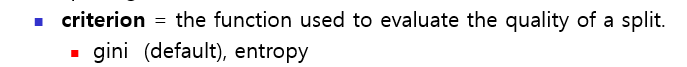

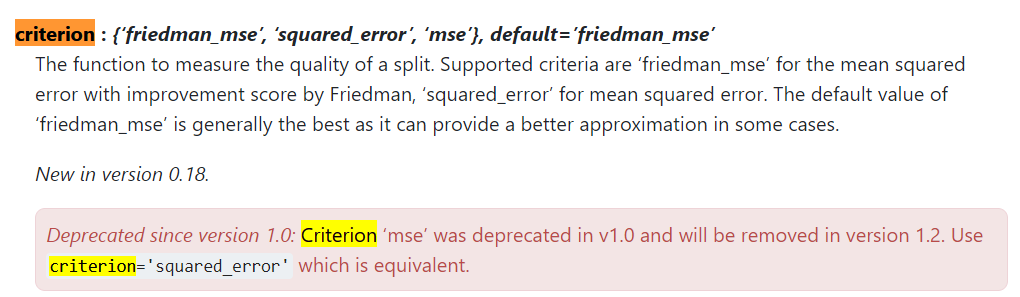

교수님께서 PPT에 설명하신 criterion과 실제 scikit learn 링크에서 찾아본 criterion이 달라서, 일단 criterion은 paramter로 빼서 수정했습니다.
2번째 링크 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [25]:
def best_n(df, ft_name, n):
    df.sort_values(by = ft_name, ascending = False, inplace = True)
    return df[:n]

In [ ]:
def best5_cv(df):
    df.sort_values(by=['score_cv'], ascending=False, inplace=True)
    return df[:5]

In [ ]:
def best5_auc(df):
    df.sort_values(by=['score_auc'], ascending=False, inplace=True)
    return df[:5]

In [ ]:
#show_regression에서 출력하려면 각 모델의 y_predict,y_test가 필요하다.
def show_regression(name, y_predict, y_test, score, scaler, model):
    title = name + ' graph\n' + 'score : ' + str(round(score,5)) + ' scaler : ' + str(scaler)#반올림 있음
    plt.title(title)
    plt.scatter(y_predict,y_test)
    plt.xlabel('predict')
    plt.ylabel('real value')
    plt.show()
    
    temp = pd.DataFrame()
    temp['y_predict'] = y_predict
    list_temp = list(y_test)
    temp['y_test'] = list_temp
    index = [i for i in range(0, len(temp))]
    temp['index'] = index
    plt.figure(figsize=(20, 5))
    plt.title(name + ' graph2')
    plt.scatter(temp['index'],temp['y_predict'], color = 'red', alpha = 0.3, label = 'predict')
    plt.scatter(temp['index'],temp['y_test'], color = 'blue', alpha = 0.3, label = 'real value')
    plt.legend()
    plt.show()
    
    print(model.coef_)
    if name != 'polynomialRegression':
        print('Weight of features in regression')
        print(model.coef_)

In [ ]:
def pie_chart(data, ft_name, ft_list): #비교를 ==으로 해서 feature가 string일 때만 사용 가능한 함수
    num_list = []#개수 리스트
    for i in range(0,len(ft_list)):
        temp_data = 0
        temp_data = data[ft_name] == ft_list[i]
        num_list.append(len(temp_data[temp_data == True]))
    plt.pie(num_list, labels=ft_list, autopct='%.1f%%')
    plt.show()

In [22]:
# main code
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
regression_name = ['polynomialRegression', 'multipleRegression']
classification_name = ['DecisionTree(gini)', 'DecisionTree(entropy)', 'KNeighborsClassifier', 'LogisticRegression']
ensemble_name = ['RandomForest','GradientBoosting(gini)','GradientBoosting(entropy)']

y = data[target_feature]
X = data.drop(target_feature, axis=1)
result_regression = []
result_classification = []
#result_ensemble = []
result = []

for model in regression_name:
    result_regression.append(Regression(X, y, model, scalers))
result_regression = sum(result_regression, [])

for model in classification_name:
    result_classification.append(Classifier(X, y, model, scalers))
result_classification = sum(result_classification, [])

for model in ensemble_name:
    result_ensemble.append(Ensemble(X, y, model, scalers))

print('all model done');

final_list = result_regression+ result_classification + result_ensemble
pd.options.display.float_format = '{:.5f}'.format
final_result = pd.DataFrame(final_list, columns=
                     ['Model', 'Scaler', 'Parameter_list', 'score_cv', 'score_auc', 'score_ac', 'score_r2', 'runtime'])

pd.set_option('display.max_rows', None)
final_result

all model done


ValueError: 8 columns passed, passed data had 120 columns

In [26]:
#best 5
best5_score_cv = best_n(final_result, 'score_cv', 5)
best5_score_cv

NameError: name 'final_result' is not defined

In [24]:
#what scaler is most?
pie_chart(best5_score_cv, 'Scaler', scalers)
#what model is most?
all_model_list = regression_name + classification_name
pie_chart(best5_score_cv, 'Model', all_model_list)

NameError: name 'pie_chart' is not defined

In [ ]:
best5_score_auc = best_n(final_result, 'score_auc', 5)
best5_score_auc

In [ ]:
#what scaler is most?
pie_chart(best5_score_auc, 'Scaler', scalers)
#what model is most?
all_model_list = regression_name + classification_name
pie_chart(best5_score_auc, 'Model', all_model_list)